# 1. 数据

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import apache_log_parser
%matplotlib inline

## 构造数据

In [10]:
fformat='%V %h %l %u %t \"%r\" %>s %b \"%{Referer}i\" \"%{User-Agent}i\" %T'
p=apache_log_parser.make_parser(fformat)

In [12]:
sample_string='www.oceanographers.ru 109.165.31.156 - - [16/Mar/2013:08:00:25 +0400] "GET /index.php?option=com_content&task=section&id=30&Itemid=265 HTTP/1.0" 200 26126 "-" "Mozilla/5.0 (Windows NT 6.1; rv:19.0) Gecko/20100101 Firefox/19.0" 0\n'
data=p(sample_string)

In [13]:
data

{'server_name2': 'www.oceanographers.ru',
 'remote_host': '109.165.31.156',
 'remote_logname': '-',
 'remote_user': '-',
 'time_received': '[16/Mar/2013:08:00:25 +0400]',
 'time_received_datetimeobj': datetime.datetime(2013, 3, 16, 8, 0, 25),
 'time_received_isoformat': '2013-03-16T08:00:25',
 'time_received_tz_datetimeobj': datetime.datetime(2013, 3, 16, 8, 0, 25, tzinfo='0400'),
 'time_received_tz_isoformat': '2013-03-16T08:00:25+04:00',
 'time_received_utc_datetimeobj': datetime.datetime(2013, 3, 16, 4, 0, 25, tzinfo='0000'),
 'time_received_utc_isoformat': '2013-03-16T04:00:25+00:00',
 'request_first_line': 'GET /index.php?option=com_content&task=section&id=30&Itemid=265 HTTP/1.0',
 'request_method': 'GET',
 'request_url': '/index.php?option=com_content&task=section&id=30&Itemid=265',
 'request_http_ver': '1.0',
 'request_url_scheme': '',
 'request_url_netloc': '',
 'request_url_path': '/index.php',
 'request_url_query': 'option=com_content&task=section&id=30&Itemid=265',
 'request

In [14]:
log_list=[]
datas=open("./data/apache_access_log").readlines()
for line in datas:
    data=p(line)
    data["time_received"]=data["time_received"][1:12]+' '+data["time_received"][13:21]+' '+data["time_received"][22:27]
    log_list.append(data)
log=pd.DataFrame(log_list)
log=log[["status","response_bytes_clf","remote_host","request_first_line","time_received"]]

In [15]:
log.head()

,status,response_bytes_clf,remote_host,request_first_line,time_received
0,200,26126,109.165.31.156,GET /index.php?option=com_content&task=section...,16/Mar/2013 08:00:25 +0400
1,200,10532,109.165.31.156,GET /templates/ja_procyon/css/template_css.css...,16/Mar/2013 08:00:25 +0400
2,200,1853,109.165.31.156,GET /templates/ja_procyon/switcher.js HTTP/1.0,16/Mar/2013 08:00:25 +0400
3,200,37153,109.165.31.156,GET /includes/js/overlib_mini.js HTTP/1.0,16/Mar/2013 08:00:25 +0400
4,200,3978,109.165.31.156,GET /modules/ja_transmenu/transmenuh.css HTTP/1.0,16/Mar/2013 08:00:25 +0400


## 数据清洗

In [16]:
log.isnull().sum()

status                0
response_bytes_clf    0
remote_host           0
request_first_line    0
time_received         0
dtype: int64

In [17]:
log.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6634 entries, 0 to 6633
Data columns (total 5 columns):
status                6634 non-null object
response_bytes_clf    6634 non-null object
remote_host           6634 non-null object
request_first_line    6634 non-null object
time_received         6634 non-null object
dtypes: object(5)
memory usage: 259.2+ KB


In [19]:
log["time_received"]=pd.to_datetime(log["time_received"])
log.set_index("time_received",inplace=True)

In [20]:
log.head()

,status,response_bytes_clf,remote_host,request_first_line
time_received,,,,
2013-03-16 04:00:25,200,26126,109.165.31.156,GET /index.php?option=com_content&task=section...
2013-03-16 04:00:25,200,10532,109.165.31.156,GET /templates/ja_procyon/css/template_css.css...
2013-03-16 04:00:25,200,1853,109.165.31.156,GET /templates/ja_procyon/switcher.js HTTP/1.0
2013-03-16 04:00:25,200,37153,109.165.31.156,GET /includes/js/overlib_mini.js HTTP/1.0
2013-03-16 04:00:25,200,3978,109.165.31.156,GET /modules/ja_transmenu/transmenuh.css HTTP/1.0


In [21]:
log["status"]=log.status.astype(np.int64)

In [23]:
# 对于response_bytes_clf字段将-替换为确实值np.nan，并将单位从字节（bytes）转换为兆字节（MB）
def dash2nan(x):
    if x=="-":
        x=np.nan
    else:
        x=float(x)/(2**20)
    return x
log["response_bytes_clf"]=log.response_bytes_clf.map(dash2nan)

In [24]:
log.head()

,status,response_bytes_clf,remote_host,request_first_line
time_received,,,,
2013-03-16 04:00:25,200,0.024916,109.165.31.156,GET /index.php?option=com_content&task=section...
2013-03-16 04:00:25,200,0.010044,109.165.31.156,GET /templates/ja_procyon/css/template_css.css...
2013-03-16 04:00:25,200,0.001767,109.165.31.156,GET /templates/ja_procyon/switcher.js HTTP/1.0
2013-03-16 04:00:25,200,0.035432,109.165.31.156,GET /includes/js/overlib_mini.js HTTP/1.0
2013-03-16 04:00:25,200,0.003794,109.165.31.156,GET /modules/ja_transmenu/transmenuh.css HTTP/1.0


# 2. 分析

## 网站流量分析

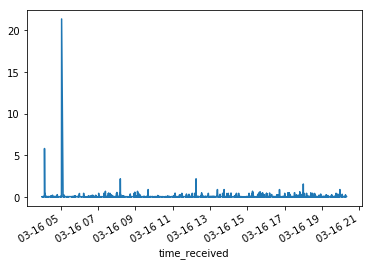

In [25]:
log["response_bytes_clf"].plot()
plt.show()

In [26]:
# 从上图可以看到有一个流量峰值出现，查看这条特殊数据
log[log["response_bytes_clf"]>20]
# 从这条数据可以看出下载了一个pdf文件造成了大流量

,status,response_bytes_clf,remote_host,request_first_line
time_received,,,,
2013-03-16 05:02:59,200,21.365701,77.50.248.20,GET /books/Bondarenko.pdf HTTP/1.0


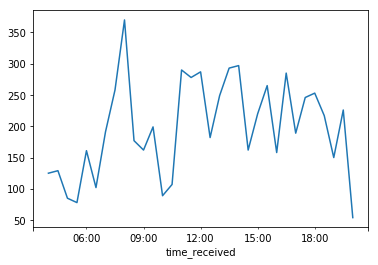

In [29]:
# 对时间以30分钟为单位进行重采样
t_log=log["response_bytes_clf"].resample("30min").count()
t_log.plot()
plt.show()

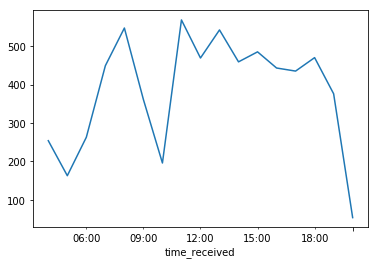

In [30]:
# 降低采样频率，以小时为单位采样
h_log=log["response_bytes_clf"].resample("H").count()
h_log.plot()
plt.show()
# 可以看到在低评率下采样的波动已经不明显

In [31]:
d_log=pd.DataFrame({"count":log["response_bytes_clf"].resample("10min").count(),
                   "sum":log["response_bytes_clf"].resample("10min").sum()})

In [34]:
d_log.head()

,count,sum
time_received,,
2013-03-16 04:00:00,59,6.957677
2013-03-16 04:10:00,35,0.929472
2013-03-16 04:20:00,31,0.771323
2013-03-16 04:30:00,35,0.771191
2013-03-16 04:40:00,38,0.943575


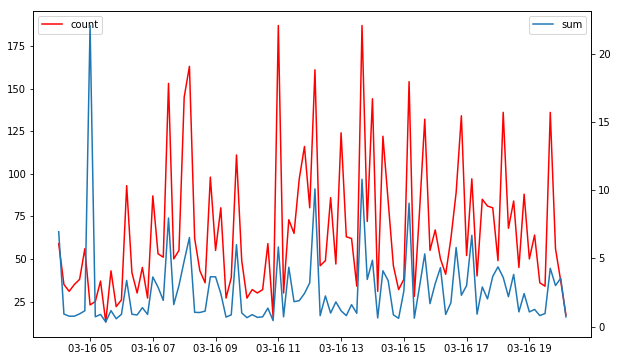

In [35]:
plt.figure(figsize=(10,6))
ax1=plt.subplot(1,1,1)
ax2=ax1.twinx()
ax1.plot(d_log["count"],color="r",label="count")
ax1.legend(loc=2)
ax2.plot(d_log["sum"],label="sum")
ax2.legend(loc=0)
plt.show()
# 从图中可以看出流量和访问次数有关系

In [48]:
# 计算相关系数
d_log.corr()

,count,sum
count,1.000000,0.512629
sum,0.512629,1.000000


## 状态码分析

In [37]:
status_log=log.groupby("status")["remote_host"].count()

In [38]:
status_log

status
200    5606
206      11
301     629
302       6
304      75
400       1
403     247
404      59
Name: remote_host, dtype: int64

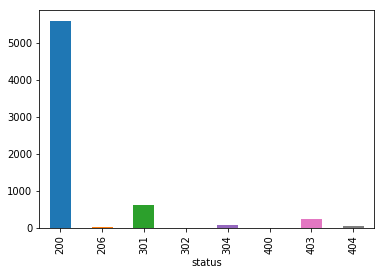

In [39]:
status_log.plot(kind="bar")
# 可以看到绝大多数访问都是正常的

In [40]:
log_404=log["status"][log['status']==404].resample("2H").count()
log_403=log["status"][log['status']==403].resample("2H").count()
log_200=log["status"][log['status']==200].resample("2H").count()

In [41]:
new_log=pd.DataFrame({"Not Found":log_404,
                     "Forbidden":log_403,
                     "Success":log_200})

In [42]:
new_log

,Not Found,Forbidden,Success
time_received,,,
2013-03-16 04:00:00,3,22,375
2013-03-16 06:00:00,2,26,607
2013-03-16 08:00:00,2,45,780
2013-03-16 10:00:00,4,29,699
2013-03-16 12:00:00,5,27,886
2013-03-16 14:00:00,21,42,785
2013-03-16 16:00:00,14,16,757
2013-03-16 18:00:00,6,38,669
2013-03-16 20:00:00,2,2,48


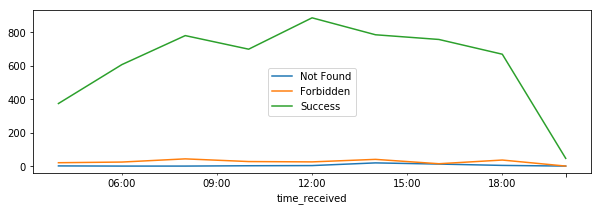

In [44]:
new_log.plot(figsize=(10,3))
plt.show()

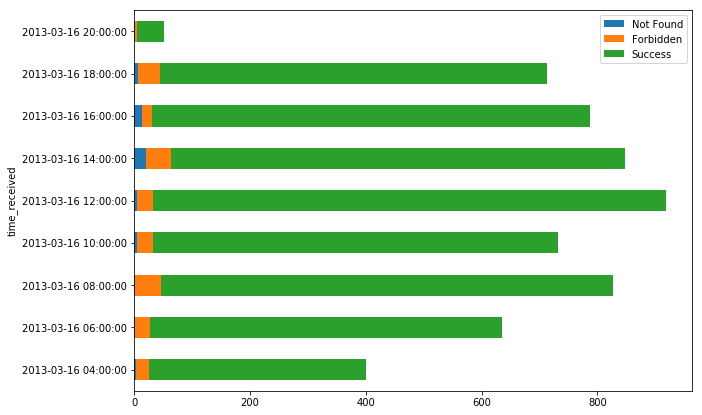

In [46]:
new_log.plot(kind="barh",stacked=True,figsize=(10,7))
plt.show()

## IP分析

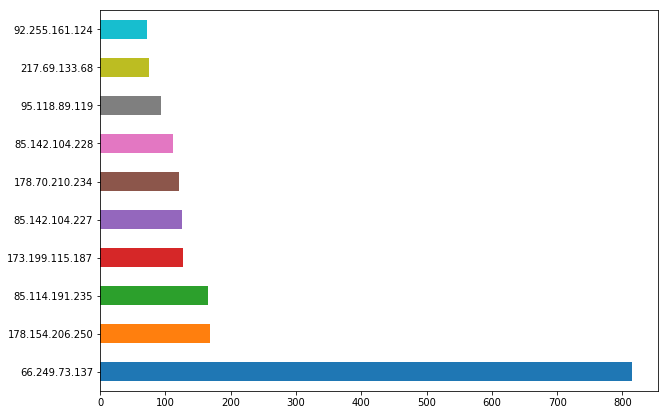

In [53]:
# 选取访问量前十位的IP绘制柱状图
ip_count=log["remote_host"].value_counts()[:10]
ip_count.plot(kind="barh",figsize=(10,7))
plt.show()

In [94]:
# pygeoip可以将ip地址解析为地理信息
import pygeoip

gi=pygeoip.GeoIP("./data/GeoLiteCity.dat",pygeoip.MEMORY_CACHE)
info=gi.record_by_addr("64.233.161.99")

In [95]:
info

{'dma_code': 807,
 'area_code': 650,
 'metro_code': 'San Francisco, CA',
 'postal_code': '94043',
 'country_code': 'US',
 'country_code3': 'USA',
 'country_name': 'United States',
 'continent': 'NA',
 'region_code': 'CA',
 'city': 'Mountain View',
 'latitude': 37.41919999999999,
 'longitude': -122.0574,
 'time_zone': 'America/Los_Angeles'}

In [212]:
# 通过IP进行分组统计
ips=log.groupby("remote_host")["status"].agg([("count_status","count")])
# 后验结果证明此条IP解析不到地址
ips.drop("91.224.246.183",inplace=True)
ips=pd.DataFrame(ips)
ips.reset_index(inplace=True)

In [214]:
ips.shape

(430, 2)

In [215]:
ips.head()

,remote_host,count_status
0,100.44.124.8,26
1,108.171.252.242,24
2,109.165.31.156,12
3,109.171.109.164,4
4,109.191.82.110,14


In [216]:
ips["country"]=[gi.record_by_addr(i)["country_code3"] for i in ips.remote_host]
ips["latitude"]=[gi.record_by_addr(i)["latitude"] for i in ips.remote_host]
ips["longitude"]=[gi.record_by_addr(i)["longitude"] for i in ips.remote_host]

In [217]:
ips.head()

,remote_host,count_status,country,latitude,longitude
0,100.44.124.8,26,USA,37.7510,-97.8220
1,108.171.252.242,24,USA,34.0115,-117.8535
2,109.165.31.156,12,RUS,47.2364,39.7139
3,109.171.109.164,4,RUS,55.0415,82.9346
4,109.191.82.110,14,RUS,55.1544,61.4297


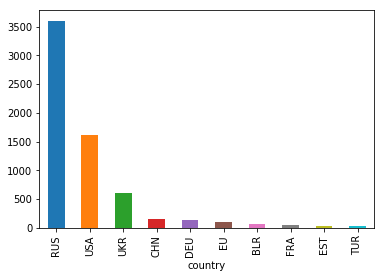

In [227]:
country=ips.groupby("country")["count_status"].sum()
country=country.sort_values(ascending=False)[:10]
country.plot(kind="bar")
plt.show()